In [1]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)  

In [2]:
# Parameters
d = 2
k = 1
delta = 0.5
N = 11

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
xc = rad.gridn(ranges, N, flat=True)
integrator = rad.integrate.MeanIntegrator(ranges, 500)
# integrator = rad.integrate.QuadIntegrator(ranges, epsabs=1e-3, epsrel=1e-3)

# Solve for approximate solution
solver = rad.solve.HelmholtzSolver(integrator, phi, delta, *xc)
approx = solver.solve(f)
error = rad.error(exact, approx, integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 0.00709507949874234
Condition Number: 10125.513120647502


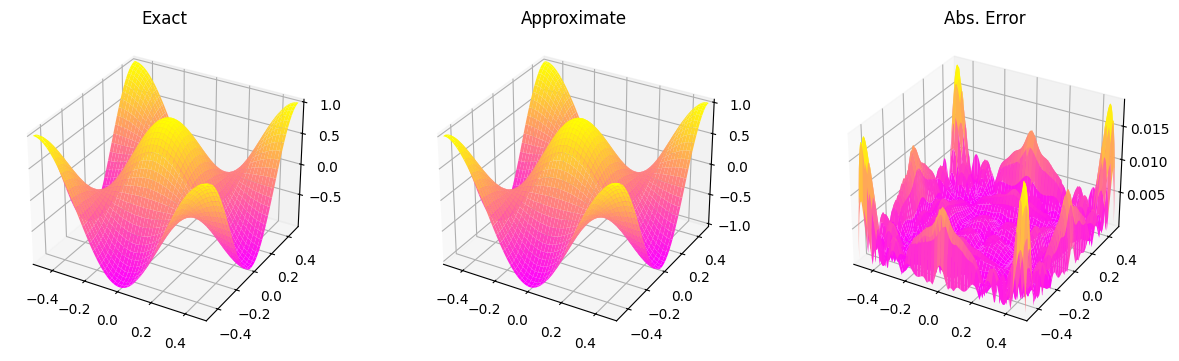

In [3]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x )),
    n=200,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4)
)